In [385]:
import pandas as pd
from math import exp, log
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from statsmodels.formula.api import ols

In [386]:
credit = pd.read_csv("C:/Users/jacob/Documents/Classes/Predictive Modeling/Group Project/credit_customers.csv")
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [387]:
func1 = lambda x: 1 if x == 'good' else 0

In [388]:
credit['credit_risk'] = credit['class'].apply(func1)
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,credit_risk
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,67.0,none,own,2.0,skilled,1.0,yes,yes,good,1
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,22.0,none,own,1.0,skilled,1.0,none,yes,bad,0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good,1
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,45.0,none,for free,1.0,skilled,2.0,none,yes,good,1
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,53.0,none,for free,2.0,skilled,2.0,none,yes,bad,0


In [389]:
credit.rename(columns = {'duration':'duration_months',
                         'employment':'years_employed', 'residence_since':'time_at_residence'}, inplace = True)
credit.head()

,checking_status,duration_months,credit_history,purpose,credit_amount,savings_status,years_employed,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,credit_risk
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,67.0,none,own,2.0,skilled,1.0,yes,yes,good,1
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,22.0,none,own,1.0,skilled,1.0,none,yes,bad,0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good,1
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,45.0,none,for free,1.0,skilled,2.0,none,yes,good,1
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,53.0,none,for free,2.0,skilled,2.0,none,yes,bad,0


In [390]:
credit.corr()

,duration_months,credit_amount,installment_commitment,time_at_residence,age,existing_credits,num_dependents,credit_risk
duration_months,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,-0.214927
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.154739
installment_commitment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.072404
time_at_residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.002967
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,0.091127
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,0.045732
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.003015
credit_risk,-0.214927,-0.154739,-0.072404,-0.002967,0.091127,0.045732,0.003015,1.000000


In [391]:
credit.drop(columns = ['own_telephone','property_magnitude','time_at_residence','num_dependents','class'], inplace = True)
credit.columns

Index(['checking_status', 'duration_months', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'years_employed',
       'installment_commitment', 'personal_status', 'other_parties', 'age',
       'other_payment_plans', 'housing', 'existing_credits', 'job',
       'foreign_worker', 'credit_risk'],
      dtype='object')

In [392]:
credit[['sex', 'marital_status']] = credit.personal_status.str.split(" ", expand = True)
credit.drop(columns=['personal_status'],inplace = True)
credit.head()

,checking_status,duration_months,credit_history,purpose,credit_amount,savings_status,years_employed,installment_commitment,other_parties,age,other_payment_plans,housing,existing_credits,job,foreign_worker,credit_risk,sex,marital_status
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,none,67.0,none,own,2.0,skilled,yes,1,male,single
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,none,22.0,none,own,1.0,skilled,yes,0,female,div/dep/mar
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,none,49.0,none,own,1.0,unskilled resident,yes,1,male,single
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,guarantor,45.0,none,for free,1.0,skilled,yes,1,male,single
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,none,53.0,none,for free,2.0,skilled,yes,0,male,single


In [393]:
credit.checking_status.value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

In [394]:
credit.checking_status.replace({'<0':'Negative', '0<=X<200':'Less than 200','>=200':'Over 200'}, inplace = True)
credit.checking_status.value_counts()

no checking      394
Negative         274
Less than 200    269
Over 200          63
Name: checking_status, dtype: int64

In [395]:
credit.years_employed.value_counts()

1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: years_employed, dtype: int64

In [396]:
credit.years_employed.replace({'<1':'Less Than 1',
                                 '1<=X<4':'1 to 4','4<=X<7':'4 to 7', '>=7':'Greater Than 7'}, inplace = True)
credit.years_employed.value_counts()

1 to 4            339
Greater Than 7    253
4 to 7            174
Less Than 1       172
unemployed         62
Name: years_employed, dtype: int64

In [397]:
credit.purpose.value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64

In [398]:
credit.purpose.replace(['education','retraining'],'Education',inplace=True)
credit.purpose.replace(['radio/tv','furniture/equipment','domestic appliance'],'Home/Appliance',inplace=True)
credit.purpose.replace(['new car','used car'],'Vehicle',inplace=True)
credit.purpose.replace(['repairs','other'],'Other',inplace=True)
credit.purpose.value_counts()

Home/Appliance    473
Vehicle           337
business           97
Education          59
Other              34
Name: purpose, dtype: int64

In [399]:
credit.savings_status.value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

In [400]:
credit.savings_status.replace(['<100','100<=X<500'],'Less Than 500',inplace = True)
credit.savings_status.replace(['500<=X<1000'],'500 to 1000',inplace = True)
credit.savings_status.replace(['>=1000'],'Over 1000',inplace = True)
credit.savings_status.replace(['no known savings'],'None',inplace = True)
credit.savings_status.value_counts()

Less Than 500    706
None             183
500 to 1000       63
Over 1000         48
Name: savings_status, dtype: int64

In [401]:
credit.head()

,checking_status,duration_months,credit_history,purpose,credit_amount,savings_status,years_employed,installment_commitment,other_parties,age,other_payment_plans,housing,existing_credits,job,foreign_worker,credit_risk,sex,marital_status
0,Negative,6.0,critical/other existing credit,Home/Appliance,1169.0,None,Greater Than 7,4.0,none,67.0,none,own,2.0,skilled,yes,1,male,single
1,Less than 200,48.0,existing paid,Home/Appliance,5951.0,Less Than 500,1 to 4,2.0,none,22.0,none,own,1.0,skilled,yes,0,female,div/dep/mar
2,no checking,12.0,critical/other existing credit,Education,2096.0,Less Than 500,4 to 7,2.0,none,49.0,none,own,1.0,unskilled resident,yes,1,male,single
3,Negative,42.0,existing paid,Home/Appliance,7882.0,Less Than 500,4 to 7,2.0,guarantor,45.0,none,for free,1.0,skilled,yes,1,male,single
4,Negative,24.0,delayed previously,Vehicle,4870.0,Less Than 500,1 to 4,3.0,none,53.0,none,for free,2.0,skilled,yes,0,male,single


In [402]:
cat_vars = ['credit_history','purpose', 'savings_status',
            'years_employed', 'other_parties','other_payment_plans',
           'housing','sex','marital_status','foreign_worker','job','checking_status']
for i in cat_vars:
    print(pd.crosstab(credit[i],
                     credit.credit_risk,
                     normalize = 'index'))

credit_risk                            0         1
credit_history                                    
all paid                        0.571429  0.428571
critical/other existing credit  0.170648  0.829352
delayed previously              0.318182  0.681818
existing paid                   0.318868  0.681132
no credits/all paid             0.625000  0.375000
credit_risk            0         1
purpose                           
Education       0.389831  0.610169
Home/Appliance  0.262156  0.737844
Other           0.382353  0.617647
Vehicle         0.314540  0.685460
business        0.350515  0.649485
credit_risk            0         1
savings_status                    
500 to 1000     0.174603  0.825397
Less Than 500   0.355524  0.644476
None            0.174863  0.825137
Over 1000       0.125000  0.875000
credit_risk            0         1
years_employed                    
1 to 4          0.306785  0.693215
4 to 7          0.224138  0.775862
Greater Than 7  0.252964  0.747036
Less Than 1  

In [467]:
value_labels = ['Low', 'Med','High']
credit['credit_amount2'] = pd.qcut(credit.credit_amount,
                                  q=3, labels = value_labels)

In [468]:
model1 = logit(formula='credit_risk ~ duration_months',
                   data=credit).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.588557
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                 0.03652
Time:                        21:47:15   Log-Likelihood:                -588.56
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 2.399e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6664      0.147     11.365      0.000       1.379       1.954
duration_months    -0.0375      0.006     -6.582      0.000      -0.049      -0.026
===================================================================================
"""

In [469]:
credit['prob_risk'] = model1.predict(credit)

<AxesSubplot:xlabel='duration_months', ylabel='prob_risk'>

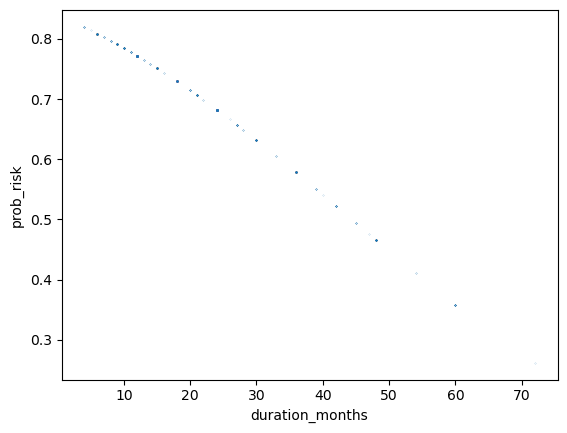

In [470]:
credit.plot.scatter(x='duration_months',
                   y='prob_risk',
                   s=0.01)

In [471]:
func1 = lambda x: 0 if x < 0.7 else 1
credit['pred'] = credit.prob_risk.apply(func1)

In [472]:
print(skm.classification_report(credit['credit_risk'],
                               credit['pred']))

              precision    recall  f1-score   support

           0       0.38      0.53      0.44       300
           1       0.76      0.63      0.69       700

    accuracy                           0.60      1000
   macro avg       0.57      0.58      0.56      1000
weighted avg       0.64      0.60      0.61      1000



In [473]:
fpr, tpr, thresholds = skm.roc_curve(credit['credit_risk'],
                                    credit['prob_risk'])

In [474]:
def plot_roc(fpr,tpr):
    # AUC score
    auc_score = skm.auc(fpr,tpr)
    # ROC curve
    skm.RocCurveDisplay(fpr=fpr, tpr=tpr,
                       roc_auc=auc_score,estimator_name='results').plot()
    # Add the diagonal line
    plt.plot([0, 1], [0, 1], 
             color='orange', 
             linestyle='--')


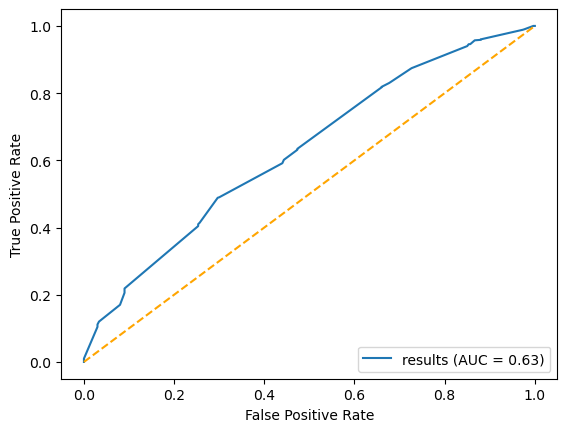

In [475]:
plot_roc(fpr,tpr)

In [476]:
model2 = logit(formula='credit_risk ~ duration_months + C(credit_history)',
                   data=credit).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.562636
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                 0.07895
Time:                        21:47:19   Log-Likelihood:                -562.64
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 2.947e-19
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               0.4931      0.322      1.532      0.125      -0.138       1.124
C(credit_history)[T.critical/other existing credit]     1.8264      0.335      5.456      0.000       1.170       2.483
C(credit_history)[T.delayed previously]                 1.2283      0.379      3.240      0.001       0.485       1.971
C(credit_history)[T.existing paid]                      1.0016      0.310      3.227      0.001       0.393       1.610
C(credit_history)[T.no credits/all paid]               -0.0550      0.448     -0.123      0.902      -0.934       0.824
duration_months                                        -0.0353      0.006     -5.918      0.000      -0.047      -0.024
=======================================================================================================================
"""

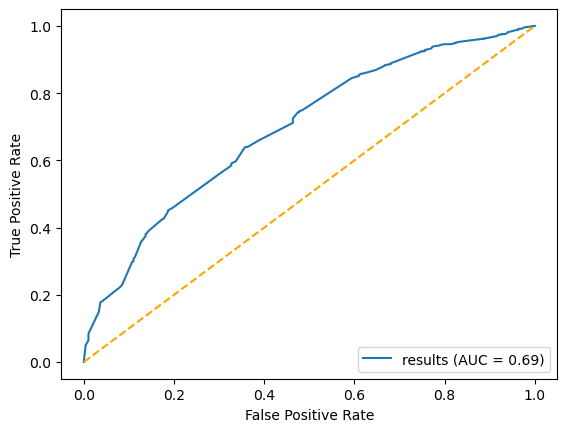

In [477]:
credit['prob_risk2'] = model2.predict(credit)
fpr, tpr, thresholds = skm.roc_curve(credit['credit_risk'],
                                    credit['prob_risk2'])

auc_score = skm.auc(fpr,tpr)
plot_roc(fpr,tpr)

In [478]:
model3 = logit(formula='credit_risk ~ duration_months + C(credit_history) + C(credit_amount2)',
                   data=credit).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.559256
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                 0.08448
Time:                        21:47:19   Log-Likelihood:                -559.26
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 2.334e-19
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               0.3819      0.327      1.168      0.243      -0.259       1.023
C(credit_history)[T.critical/other existing credit]     1.8021      0.336      5.370      0.000       1.144       2.460
C(credit_history)[T.delayed previously]                 1.1842      0.381      3.111      0.002       0.438       1.930
C(credit_history)[T.existing paid]                      0.9834      0.311      3.159      0.002       0.373       1.594
C(credit_history)[T.no credits/all paid]               -0.1040      0.451     -0.231      0.818      -0.987       0.779
C(credit_amount2)[T.Med]                                0.4721      0.190      2.490      0.013       0.101       0.844
C(credit_amount2)[T.High]                               0.4430      0.223      1.989      0.047       0.006       0.880
duration_months                                        -0.0433      0.008     -5.757      0.000      -0.058      -0.029
=======================================================================================================================
"""

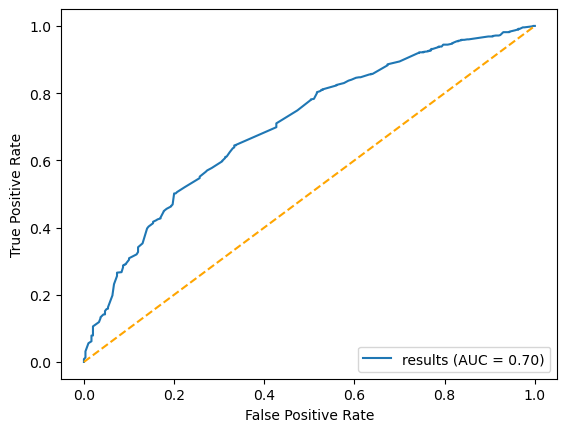

In [479]:
credit['prob_risk3'] = model3.predict(credit)
fpr, tpr, thresholds = skm.roc_curve(credit['credit_risk'],
                                    credit['prob_risk3'])

auc_score = skm.auc(fpr,tpr)
plot_roc(fpr,tpr)

In [480]:
model4 = logit(formula='credit_risk ~ duration_months + C(credit_history) + C(credit_amount2) + C(checking_status)',
                   data=credit).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.508055
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.1683
Time:                        21:47:20   Log-Likelihood:                -508.05
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 1.085e-38
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               0.3187      0.367      0.869      0.385      -0.400       1.037
C(credit_history)[T.critical/other existing credit]     1.4123      0.356      3.962      0.000       0.714       2.111
C(credit_history)[T.delayed previously]                 0.7872      0.407      1.935      0.053      -0.010       1.585
C(credit_history)[T.existing paid]                      0.7872      0.331      2.376      0.017       0.138       1.436
C(credit_history)[T.no credits/all paid]               -0.1839      0.478     -0.385      0.700      -1.121       0.753
C(credit_amount2)[T.Med]                                0.4823      0.202      2.393      0.017       0.087       0.877
C(credit_amount2)[T.High]                               0.4771      0.235      2.034      0.042       0.017       0.937
C(checking_status)[T.Negative]                         -0.5239      0.186     -2.822      0.005      -0.888      -0.160
C(checking_status)[T.Over 200]                          0.6138      0.341      1.799      0.072      -0.055       1.283
C(checking_status)[T.no checking]                       1.3800      0.209      6.593      0.000       0.970       1.790
duration_months                                        -0.0432      0.008     -5.457      0.000      -0.059      -0.028
=======================================================================================================================
"""

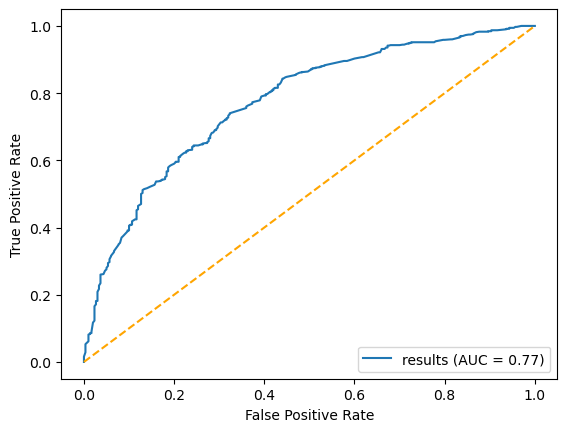

In [481]:
credit['prob_risk4'] = model4.predict(credit)
fpr, tpr, thresholds = skm.roc_curve(credit['credit_risk'],
                                    credit['prob_risk4'])

auc_score = skm.auc(fpr,tpr)
plot_roc(fpr,tpr)

In [484]:
model5 = logit(formula='credit_risk ~ duration_months + C(credit_amount2) + C(checking_status)',
                   data=credit).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.522415
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.1448
Time:                        21:50:12   Log-Likelihood:                -522.41
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 1.546e-35
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             1.1811      0.201      5.877      0.000       0.787       1.575
C(credit_amount2)[T.Med]              0.4929      0.198      2.487      0.013       0.104       0.881
C(credit_amount2)[T.High]             0.4940      0.230      2.150      0.032       0.044       0.944
C(checking_status)[T.Negative]       -0.4949      0.180     -2.749      0.006      -0.848      -0.142
C(checking_status)[T.Over 200]        0.6661      0.335      1.989      0.047       0.010       1.323
C(checking_status)[T.no checking]     1.5295      0.206      7.438      0.000       1.127       1.933
duration_months                      -0.0465      0.008     -5.998      0.000      -0.062      -0.031
=====================================================================================================
"""

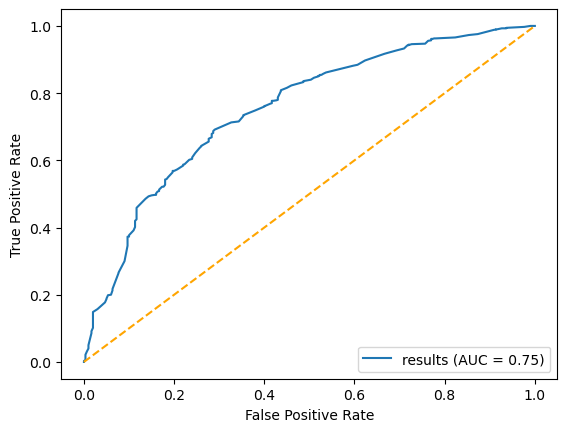

In [485]:
credit['prob_risk5'] = model5.predict(credit)
fpr, tpr, thresholds = skm.roc_curve(credit['credit_risk'],
                                    credit['prob_risk5'])

auc_score = skm.auc(fpr,tpr)
plot_roc(fpr,tpr)

In [486]:
model6 = logit(formula='credit_risk ~ duration_months + C(credit_amount2) + C(checking_status) + C(years_employed)',
                   data=credit).fit()
model6.summary()

Optimization terminated successfully.
         Current function value: 0.513095
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.1601
Time:                        21:54:39   Log-Likelihood:                -513.10
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 1.374e-36
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.1830      0.230      5.134      0.000       0.731       1.635
C(credit_amount2)[T.Med]                0.5485      0.201      2.727      0.006       0.154       0.943
C(credit_amount2)[T.High]               0.5136      0.233      2.201      0.028       0.056       0.971
C(checking_status)[T.Negative]         -0.5396      0.183     -2.950      0.003      -0.898      -0.181
C(checking_status)[T.Over 200]          0.6763      0.339      1.998      0.046       0.013       1.340
C(checking_status)[T.no checking]       1.4661      0.209      7.025      0.000       1.057       1.875
C(years_employed)[T.4 to 7]             0.6659      0.242      2.756      0.006       0.192       1.140
C(years_employed)[T.Greater Than 7]     0.2918      0.205      1.422      0.155      -0.110       0.694
C(years_employed)[T.Less Than 1]       -0.3952      0.215     -1.836      0.066      -0.817       0.027
C(years_employed)[T.unemployed]        -0.0718      0.319     -0.225      0.822      -0.696       0.553
duration_months                        -0.0506      0.008     -6.352      0.000      -0.066      -0.035
=======================================================================================================
"""

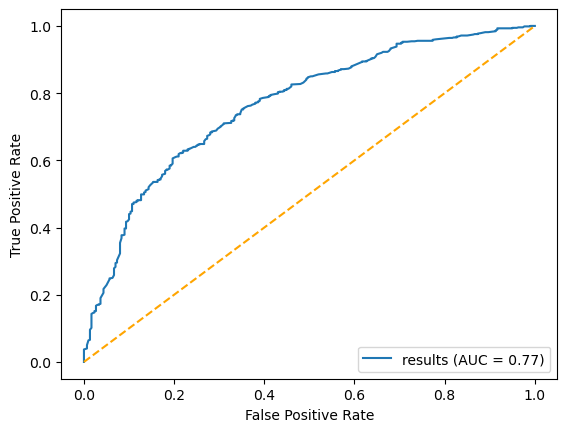

In [487]:
credit['prob_risk6'] = model6.predict(credit)
fpr, tpr, thresholds = skm.roc_curve(credit['credit_risk'],
                                    credit['prob_risk6'])

auc_score = skm.auc(fpr,tpr)
plot_roc(fpr,tpr)

In [492]:
model7 = logit(formula='credit_risk ~ duration_months + C(credit_amount2) + C(checking_status) + C(years_employed) + C(foreign_worker)',
                   data=credit).fit()
model7.summary()

Optimization terminated successfully.
         Current function value: 0.509346
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      988
Method:                           MLE   Df Model:                           11
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.1662
Time:                        21:57:26   Log-Likelihood:                -509.35
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 1.743e-37
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               2.4926      0.598      4.167      0.000       1.320       3.665
C(credit_amount2)[T.Med]                0.5510      0.202      2.729      0.006       0.155       0.947
C(credit_amount2)[T.High]               0.4959      0.234      2.121      0.034       0.038       0.954
C(checking_status)[T.Negative]         -0.5808      0.184     -3.152      0.002      -0.942      -0.220
C(checking_status)[T.Over 200]          0.6520      0.340      1.917      0.055      -0.014       1.318
C(checking_status)[T.no checking]       1.4643      0.209      7.016      0.000       1.055       1.873
C(years_employed)[T.4 to 7]             0.6674      0.243      2.750      0.006       0.192       1.143
C(years_employed)[T.Greater Than 7]     0.3141      0.206      1.525      0.127      -0.090       0.718
C(years_employed)[T.Less Than 1]       -0.4230      0.217     -1.952      0.051      -0.848       0.002
C(years_employed)[T.unemployed]        -0.0263      0.319     -0.083      0.934      -0.652       0.599
C(foreign_worker)[T.yes]               -1.3727      0.567     -2.421      0.015      -2.484      -0.261
duration_months                        -0.0485      0.008     -6.071      0.000      -0.064      -0.033
=======================================================================================================
"""

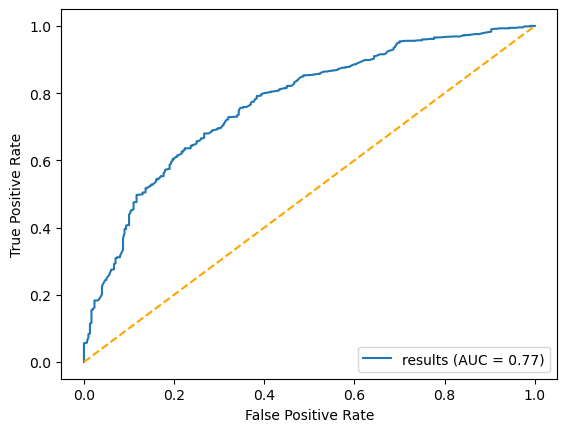

In [493]:
credit['prob_risk7'] = model7.predict(credit)
fpr, tpr, thresholds = skm.roc_curve(credit['credit_risk'],
                                    credit['prob_risk7'])

auc_score = skm.auc(fpr,tpr)
plot_roc(fpr,tpr)

### Interpretation

I believe that model 6 is my best model I created. The AUC score is .77, the highest I could get it. Although some of the variables werent significant, most were. I couldnt create a model with a high AUC without having at least some of the variables insignificant. That being said, model 6 is the closest I could get to getting all of the variables significance levels as low as possible. From my findings, I believe that determining whether someone is a credit risk weighs heavily on the duration of the loan, the credit amount, the status of the individuals checking account and the years the individual has been employed.